In [ ]:
import requests
import pandas as pd
from datetime import datetime
import math

API_KEY = 'a4b5182d5a22482688dab1cbf22f78fd'

keywords = [
    # LNG core terms
    "lng", "liquefied natural gas", "cng", "compressed natural gas", "shale gas",
    "gas supply", "gas demand", "gas imports", "gas exports", "gas prices",
    "gas storage", "gas infrastructure", "gas transportation", "gas distribution",
    "gas pipelines", "lng terminals", "lng regasification", "lng liquefaction",
    "lng shipping", "lng tankers", "lng carriers", "floating lng", "flng",
    "lng projects", "lng contracts", "lng spot market", "lng futures", "lng index",
    "lng market", "lng trade", "lng cargoes", "lng supply chain", "lng bunkering",
    "lng storage tanks", "lng offloading", "lng import terminal", "lng export terminal",
    "lng hub", "lng demand", "lng prices", "lng volatility",

    # Benchmarks & indices
    "ttf", "title transfer facility", "jkm", "japan korea marker", "henry hub",
    "nbp", "national balancing point", "asian spot lng", "european gas hub",
    "global gas benchmark", "ice futures gas", "cme natural gas", "gas index",
    "spot benchmark", "gas pricing hub",

    # Natural gas pipeline related
    "pipeline", "natural gas pipeline", "gas interconnector", "cross-border pipeline",
    "offshore pipeline", "onshore pipeline", "pipeline network", "pipeline capacity",
    "pipeline infrastructure", "pipeline construction", "pipeline expansion",
    "pipeline disruption", "pipeline sabotage", "pipeline flow", "pipeline bottleneck",
    "pipeline tariffs", "pipeline geopolitics", "pipeline transit fees",

    # Major pipelines
    "nord stream", "nord stream 2", "turkstream", "south stream",
    "eastmed pipeline", "trans adriatic pipeline", "tap", "trans anatolian pipeline",
    "tanap", "yamal-europe pipeline", "druzhba pipeline", "trans-saharan pipeline",
    "balticconnector", "interconnector greece-bulgaria", "igb pipeline",

    # Energy & commodities
    "energy", "oil and gas", "petroleum", "hydrocarbons", "crude oil",
    "brent crude", "wti crude", "refined products", "condensate",
    "propane", "butane", "lpg", "liquefied petroleum gas", "methane",
    "fossil fuels", "clean energy", "renewable energy", "energy transition",
    "decarbonization", "carbon capture", "strategic petroleum reserves",
    "strategic gas reserves",

    # Companies & players
    "gazprom", "qatargas", "novatek", "exxonmobil", "shell", "bp",
    "totalenergies", "chevron", "equinor", "aramco", "adnoc", "petronas",
    "cnpc", "china national petroleum corporation", "sinopec", "cnooc",
    "cheniere", "freeport lng", "tellurian", "venture global lng",

    # Geopolitics & security
    "geopolitics", "energy security", "energy crisis", "energy dependence",
    "sanctions", "embargo", "trade restrictions", "gas weaponization",
    "energy shortages", "gas disruptions", "energy diplomacy",

    # Countries & regions
    "russia", "ukraine", "eu", "europe", "germany", "france", "netherlands",
    "norway", "uk", "usa", "united states", "canada", "middle east",
    "qatar", "iran", "iraq", "saudi arabia", "algeria", "nigeria",
    "mozambique", "australia",

    # Conflicts & politics
    "war", "conflict", "invasion", "putin", "kremlin", "nato",
    "european commission", "energy politics",

    # Markets & trading
    "spot market", "commodity markets", "futures market", "derivatives",
    "swaps", "forward contracts", "trading hubs", "arbitrage", "hedging",
    "price volatility", "market liquidity", "demand shock", "supply shock",
    "global supply chains", "energy flows",

    # Green transition & alternatives
    "net zero", "emissions", "carbon pricing", "renewable alternatives",
    "hydrogen economy", "green hydrogen", "blue hydrogen", "critical infrastructure",
    "global energy mix", "opec"
]

In [ ]:


# Helper: break keywords into smaller batches within 500-character query limits
def chunk_keywords(keywords, max_chars=480):
    batches = []
    current_batch = []
    current_len = 0

    for kw in keywords:
        kw_quoted = f'"{kw}"' if ' ' in kw else kw
        add_len = len(kw_quoted) + 4  # OR + spaces
        if current_len + add_len > max_chars:
            batches.append(current_batch)
            current_batch = [kw]
            current_len = len(kw_quoted)
        else:
            current_batch.append(kw)
            current_len += add_len
    if current_batch:
        batches.append(current_batch)
    return batches

# Process each chunked query separately
articles_data = []
keyword_batches = chunk_keywords(keywords)

for batch in keyword_batches:
    query = ' OR '.join(f'"{kw}"' if ' ' in kw else kw for kw in batch)

    params = {
        'q': query,
        'from': (datetime.today() - pd.Timedelta(days=7)).strftime('%Y-%m-%d'),
        'to': datetime.today().strftime('%Y-%m-%d'),
        'sortBy': 'publishedAt',
        'pageSize': 100,
        'language': 'en',
        'apiKey': API_KEY
    }

    response = requests.get('https://newsapi.org/v2/everything', params=params)
    data = response.json()

    for article in data.get('articles', []):
        title = article.get('title', '')
        description = article.get('description') or ''
        content = f"{title} {description}".lower()

        match_count = sum(1 for kw in keywords if kw.lower() in content)

        iso_date = article.get('publishedAt', '')
        readable_date = datetime.fromisoformat(iso_date.rstrip("Z")).strftime("%Y-%m-%d %H:%M") if iso_date else None

        source = article.get('source', {}).get('name', 'Unknown')
        url = article.get('url', '')
        domain = url.split("//")[-1].split("/")[0] if url else 'unknown'

        articles_data.append({
            'Date': readable_date,
            'Title': title,
            'Description': description,
            'Source': source,
            'Domain': domain,
            'Keyword Matches': match_count
        })

# Create DataFrame
df = pd.DataFrame(articles_data).drop_duplicates(subset=['Title'])
print(df.head())
print(f"\n✅ Total articles collected: {len(df)}")

               Date  \
0  2025-09-14 09:30   
1  2025-09-14 09:30   
2  2025-09-14 09:29   
3  2025-09-14 09:14   
4  2025-09-14 09:01   

                                                                        Title  \
0                   Inspire Investing LLC Raises Holdings in ONEOK, Inc. $OKE   
1  Inspire Investing LLC Sells 2,036 Shares of National Fuel Gas Company $NFG   
2                   Latest LNG deals to advance energy hub goals, say experts   
3             Strs Ohio Makes New Investment in Atmos Energy Corporation $ATO   
4                 Texas gas prices declined from last week: See how much here   

                                                                                                                                                                                                                                                            Description  \
0  Inspire Investing LLC increased its holdings in ONEOK, Inc. (NYSE:OKE – Free Report) by 17.8% in the 1st

In [46]:
df[["Keyword Matches" , "Title"]].sort_values("Keyword Matches", ascending=False)[df["Keyword Matches"] > 0]

C:\Users\Koenixel\AppData\Local\Temp\ipykernel_3656\2313815408.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[["Keyword Matches" , "Title"]].sort_values("Keyword Matches", ascending=False)[df["Keyword Matches"] > 0]


,Keyword Matches,Title
137,9,Global LNG Market Faces Looming Supply Glut After Years of Scarcity
658,7,Germany Just Noticed Renewable Energy has a Cybersecurity Problem
43,7,Trump tells NATO members they must move first on Russia sanctions over Ukraine
194,6,Why Some NATO Nations Are Still Hooked on Russia
118,6,It's crunch time for Canada’s first Atlantic coast LNG hub
672,5,Brent Hits $67 After Primorsk Strike
640,5,"Russia kills 4 in heavy blitz on Donetsk, as Kremlin dashes hope of resuming peace talks"
718,5,"War for Ukraine Day 1,295: You Probe with Bayonets – if You Find Mush, You Push."
216,5,Ukraine: Trump tells NATO allies to stop buying Russian oil
136,5,China Is Cranking Up Its LNG Trade With Russia


<Axes: title={'center': 'Top 10 Sources by Keyword Matches'}, ylabel='Source'>

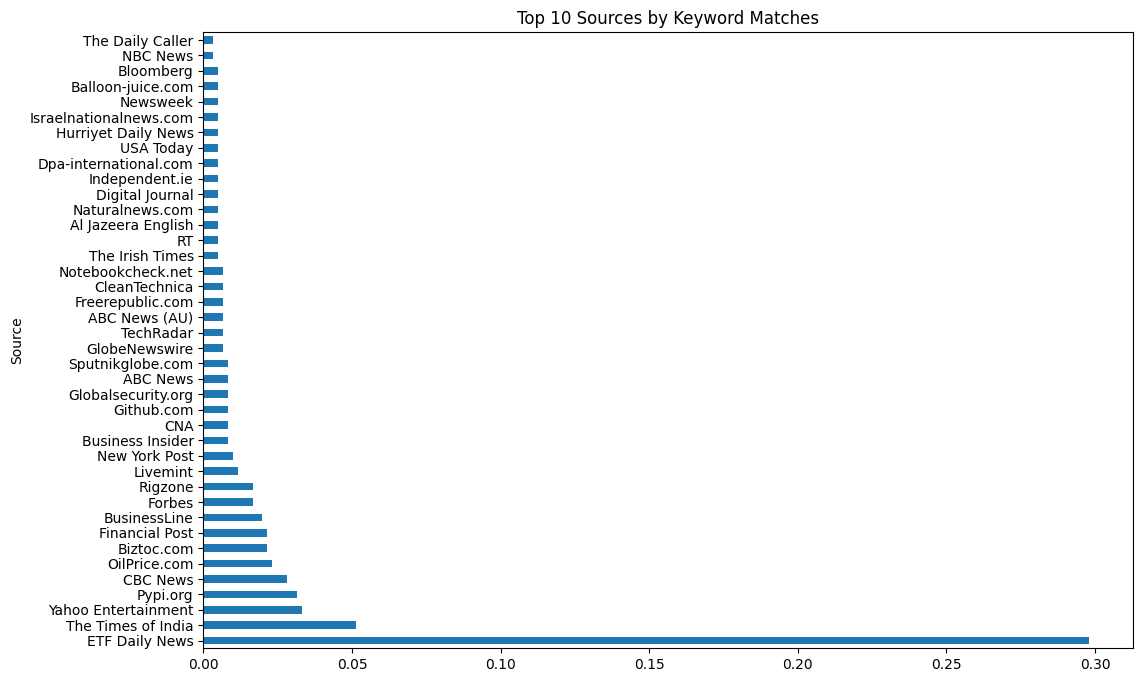

In [18]:
df["Source"].value_counts("Keyword Matches").sort_values(ascending=False).head(40).plot(kind='barh', figsize=(12, 8), title='Top 10 Sources by Keyword Matches')

In [49]:
df["Keyword Matches"].groupby(df["Source"]).sum().sort_values(ascending=False).head(10)

Source
ETF Daily News         58
Financial Post         35
OilPrice.com           34
The Times of India     22
Rigzone                21
Pypi.org               16
Forbes                 16
Biztoc.com             15
Balloon-juice.com      13
Yahoo Entertainment    13
Name: Keyword Matches, dtype: int64

In [ ]:
df[df["Source"]=="ETF Daily News"].sort_values("Date", ascending=False)